<a href="https://colab.research.google.com/github/alayagithub/Python_Geopandas/blob/main/First_GIS_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of Geopandas**

In [4]:
#following is the code to install geopandas
pip install geopandas

In [51]:
'''import the installed geopandas package so that we can
use its functions (and I am using shortcut as gpd and
It will be stored as GPD )'''
import geopandas as gpd
#import matplotlib which is for the visulaization of our data
import matplotlib.pyplot as plt
#We have to make this matplotlib as inline
%matplotlib inline


**Adding Vector Data (Shp and geojson)**

In [15]:
#Adding geojson file into the python/geopackage
# We use gpd.read_file('path of the geojson file')
#municipality_Json is the name we are going to give the added geojson file
municipality_Json = gpd.read_file('/content/municipality.geojson')

In [16]:
#similarly, we are adding shapefile here
#municipality_shp is the name we are going to give the added shape file
municipality_shp = gpd.read_file('/content/municipality.shp')

**Reading Metadata**

In [18]:
#length of a file (i.e. column number)
len(municipality_shp)

775

In [19]:
#displaying the title/column names (e.g. PROVINCE, PR_NAME, etc.) of the vector data
municipality_shp.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [22]:
#knowing the type of geometry of features like point, line and polygon
municipality_shp.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
770    Polygon
771    Polygon
772    Polygon
773    Polygon
774    Polygon
Length: 775, dtype: object

In [25]:
#knowing the no. of type of features (no. of rows, no. of columns)
municipality_shp.shape

(775, 6)

In [27]:
#knowing the coordinate reference system of our file
municipality_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
#knowing the type of our file/data
type(municipality_shp)

geopandas.geodataframe.GeoDataFrame

**Map Visualization**

<Axes: >

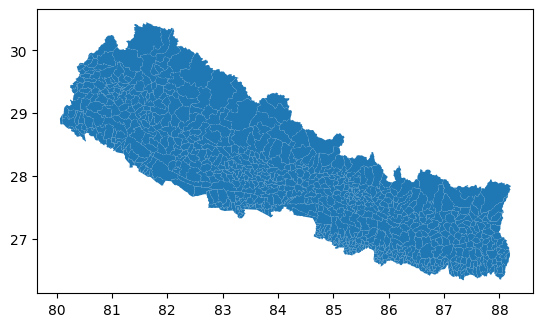

In [30]:
#Plotting the map/vector data/shapefile we use plot()
municipality_shp.plot()

<Axes: >

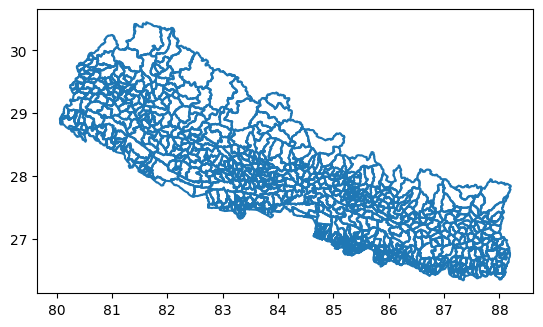

In [52]:
#Plotting only the boundary of the polygons
municipality_shp.boundary.plot()

<Axes: >

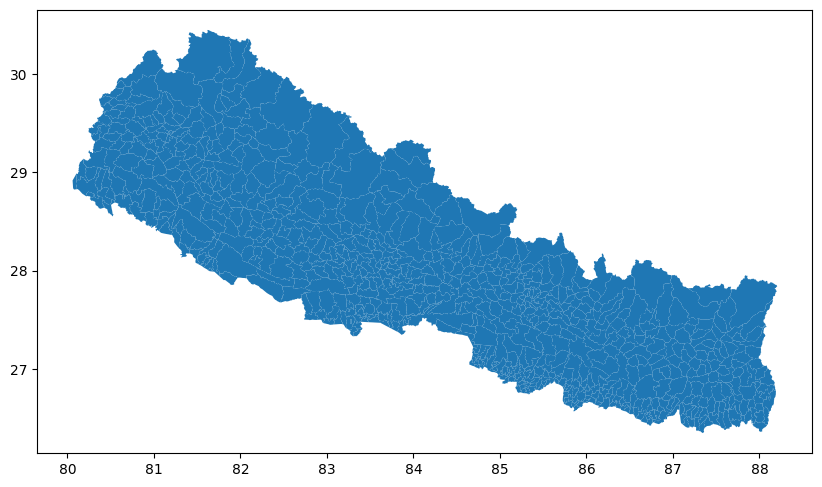

In [32]:
#Specifying hte size of map to plot e.g. 10*10
municipality.plot(figsize=(10,10))

<Axes: >

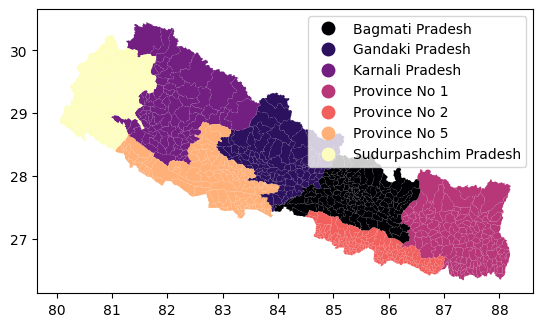

In [53]:
#colouring the map using cmap and writing the legend of the map
#OR mapping Nepal based on Province
municipality_shp.plot("PR_NAME", cmap='magma', legend=True)

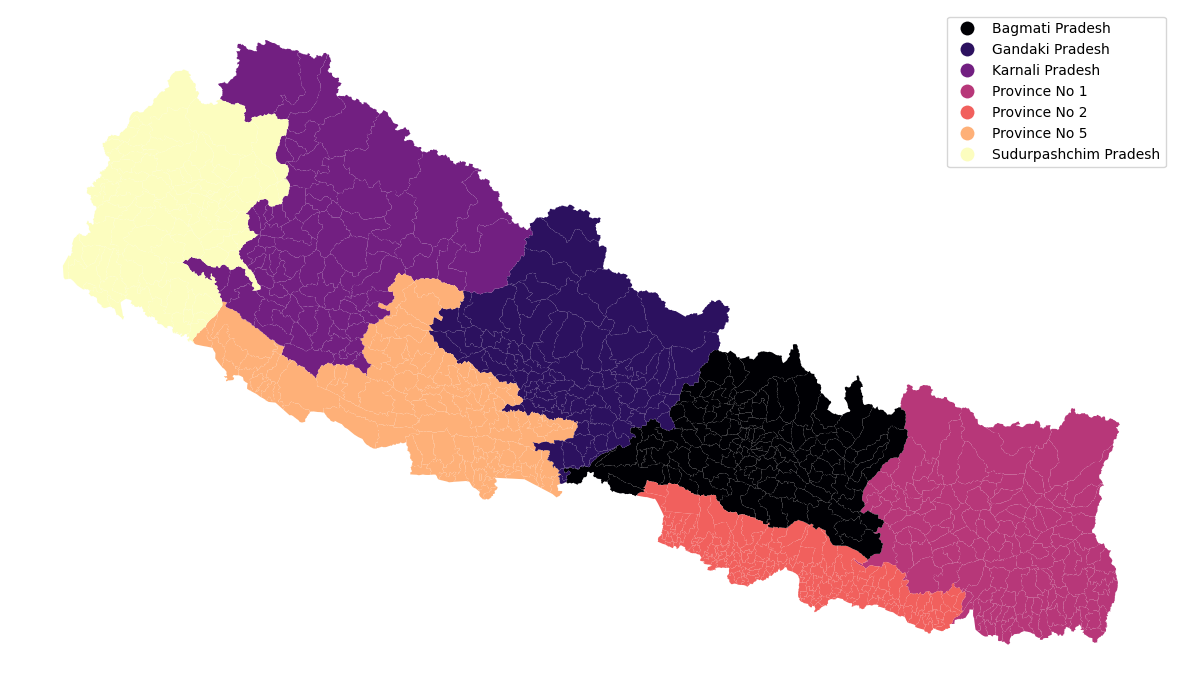

In [41]:
#removing the map axes
ax=municipality_shp.plot("PR_NAME", cmap='magma', legend=True, figsize=(15,15))
ax.set_axis_off()

**Writing Data**

In [42]:
#importing the municipality.shp file into abc
abc=gpd.read_file('/content/municipality.shp')

In [44]:
#adding/saving abc file (i.e. municipality.shp) to the specific
#folder or file and we'have save
#it as municipality.shp again.
abc.to_file('/content/sample_data/output/municipality.shp')

In [46]:
#saving abc file as geojson file
#give driver and encoding (utf-8).
abc.to_file('/content/sample_data/output/municipality.geojson', driver= 'GeoJSON', encoding='utf-8')

In [47]:
#saving abc file or data into geopackage file
abc.to_file('/content/sample_data/output/municipality.gpkg', driver= 'GPKG', layer= 'palika', encoding='utf-8')

**Working with Attribute Data**
**/ Exercise-1:**
1) Read the file rupandehi.shp in your data folder   2) show the shape of the file    3) find the lenght of the file    4) find teh geometry type of the data

In [105]:
#extracting a single district (all the municipalit of rupandehi) from whole municipalities of Nepal
rupandehi=municipality_shp[municipality['DISTRICT']=='RUPANDEHI']


<Axes: >

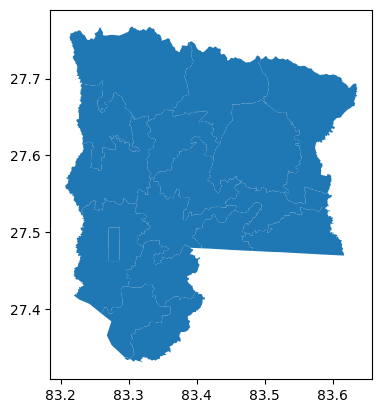

In [106]:
rupandehi.plot()

In [107]:
rupandehi.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
509,5,Province No 5,RUPANDEHI,Butwal,Upamahanagarpalika,"POLYGON ((83.39404 27.74746, 83.39444 27.74707..."
510,5,Province No 5,RUPANDEHI,Devdaha,Nagarpalika,"POLYGON ((83.50562 27.72572, 83.50622 27.72560..."
511,5,Province No 5,RUPANDEHI,Gaidahawa,Gaunpalika,"POLYGON ((83.32845 27.65126, 83.32876 27.65095..."
512,5,Province No 5,RUPANDEHI,Kanchan,Gaunpalika,"POLYGON ((83.26076 27.69161, 83.26059 27.68940..."
513,5,Province No 5,RUPANDEHI,Kotahimai,Gaunpalika,"POLYGON ((83.33693 27.48945, 83.33803 27.48927..."


In [55]:
len(rupandehi)

17

In [56]:
rupandehi.shape

(17, 6)

<Axes: >

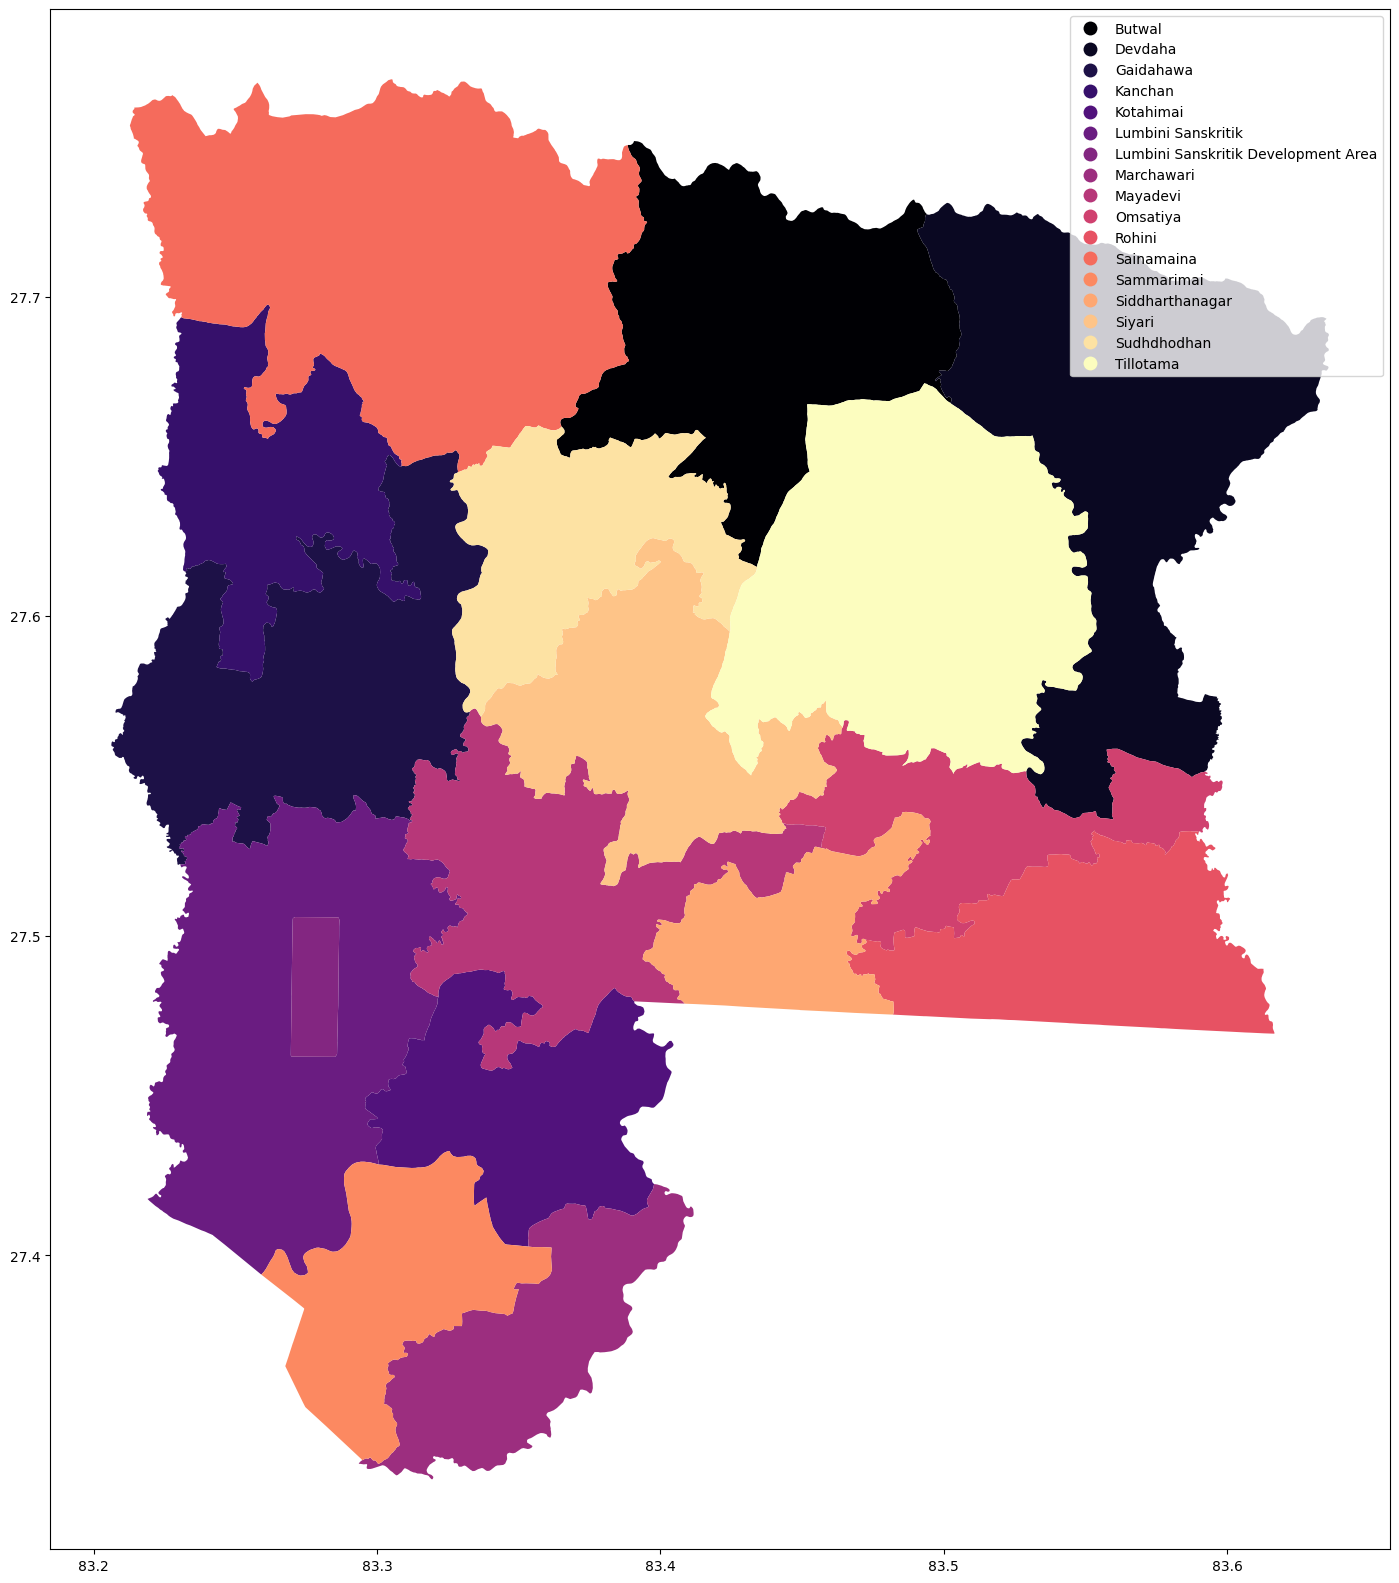

In [58]:
#colouring the map using cmap and writing the legend of the map
#OR mapping Rupandehi based on
rupandehi.plot("PALIKA", cmap='magma', legend=True, figsize=(20,20))

In [61]:
#importing municipality.shp and saving municipality
municipality=gpd.read_file('/content/sample_data/output/municipality.shp')

In [62]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [63]:
#creating a new column named 'area' and initializing values of area as 0 to all.
municipality['area']=0

In [65]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943...",0
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831...",0
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768...",0
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000...",0
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119...",0


In [67]:
#giving coordinate system or converting from existing
# to our actual coordinate system
# for calculating the actual area
#as we know the coordinate system of NEPAL has epsg code as '32645'.
municipality_crs = municipality.to_crs(epsg=32645)

In [68]:
# Now we are going to find the area of municipality
municipality_crs['area']=municipality_crs.geometry.area /10**6

In [70]:
#now finding area of each municipality
municipality_crs.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((560307.153 3027612.864, 560428.320 3...",88.521700
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((549815.446 3034054.303, 550082.592 3...",137.371061
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((550573.020 3049473.152, 550537.274 3...",209.626709
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((565665.744 3067475.242, 565704.431 3...",441.435863
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((582308.234 3092096.983, 582369.345 3...",1851.420797


<Axes: >

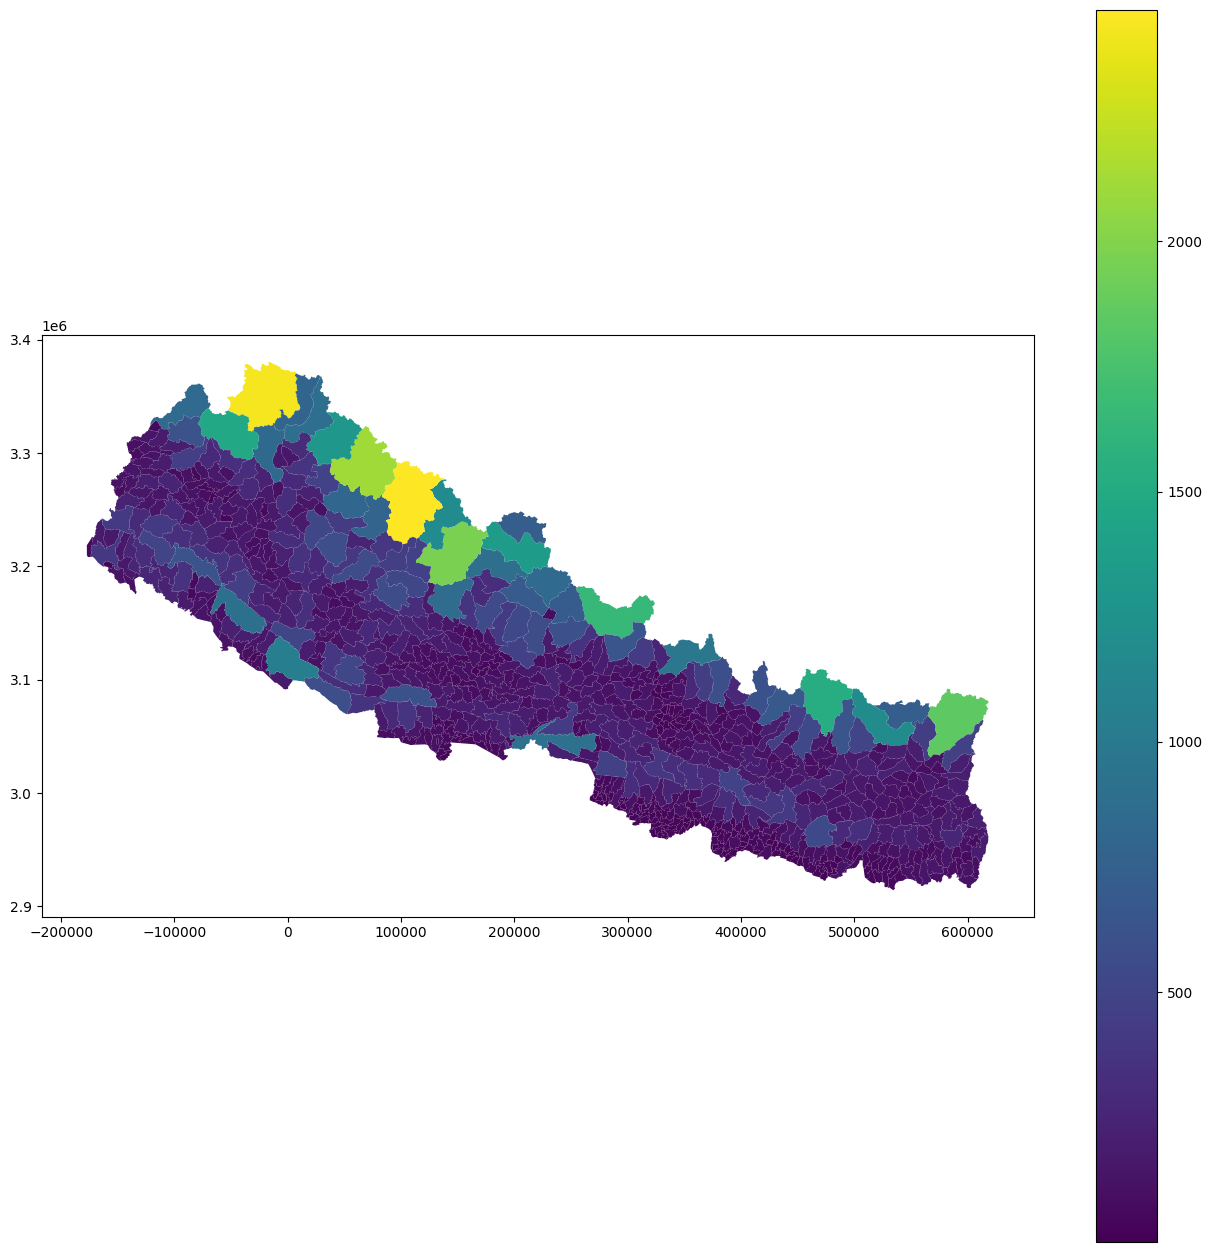

In [72]:
municipality_crs.plot('area', legend=True, figsize=(16,16))

**Working with the geometry of the file**

In [73]:
#for working with the geometry, we will be using the library named 'shapely'
# so, import shapely library
import shapely

In [76]:
# to create a point, polygon and line we are going to import from shapely.geometry
from shapely.geometry import Point, LineString, Polygon

**Creating a Geometric Object**

In [83]:
#creating a geometric object
#adding a pair of coordinates of point
point = Point(1,1)
#adding an array of pair of coordinates
line=LineString([(0,0),(5,9),(10,8)])
#for polygon, we can perform bufferring to create it
poly= line.buffer(1)

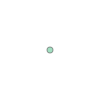

In [80]:
#visualizing a point
point

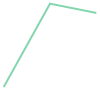

In [81]:
#visualizing a line
line

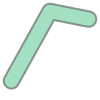

In [82]:
#visualizing a polygon
poly

In [86]:
#checking whether the point lies within the polygon or not.
#if lies--True  if not, --False
point.within(poly)

True

In [87]:
point1=Point(1,7)
point1.within(poly)

False

In [90]:
# To check whether the polygon contains the point.
poly.contains(point)

True

In [91]:
#If we want to combine all the points, lines and polygons into a geoseries, then
#create geoseries
gs = gpd.GeoSeries([Point(-10,15), Point(10,2), Point(-5,16)])

In [92]:
#displaying contents of geoseries file 'gs'.
gs

0    POINT (-10.00000 15.00000)
1      POINT (10.00000 2.00000)
2     POINT (-5.00000 16.00000)
dtype: geometry

<Axes: >

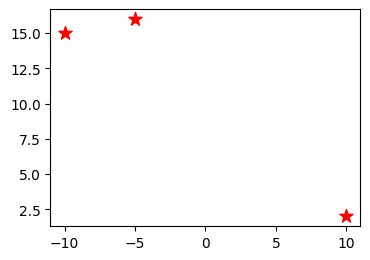

In [94]:
#Visualizing these points
gs.plot(marker="*", color='red', markersize=100, figsize=(4,4))

In [102]:
#Importing municipalities of Palpa
palpa=municipality_shp[municipality['DISTRICT']=='PALPA']


<Axes: >

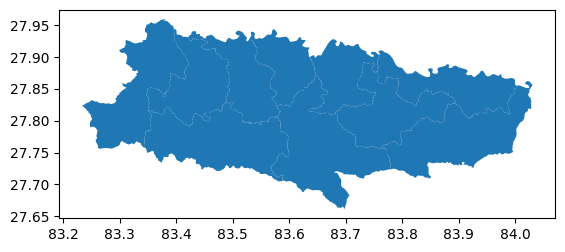

In [103]:
palpa.plot()

<Axes: >

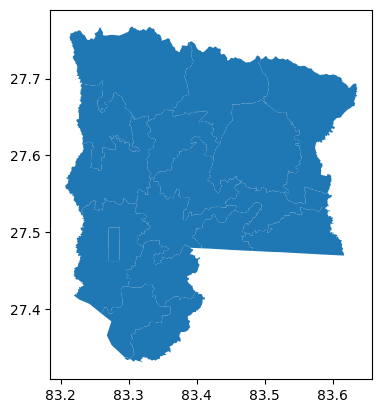

In [104]:
rupandehi.plot()

<Axes: >

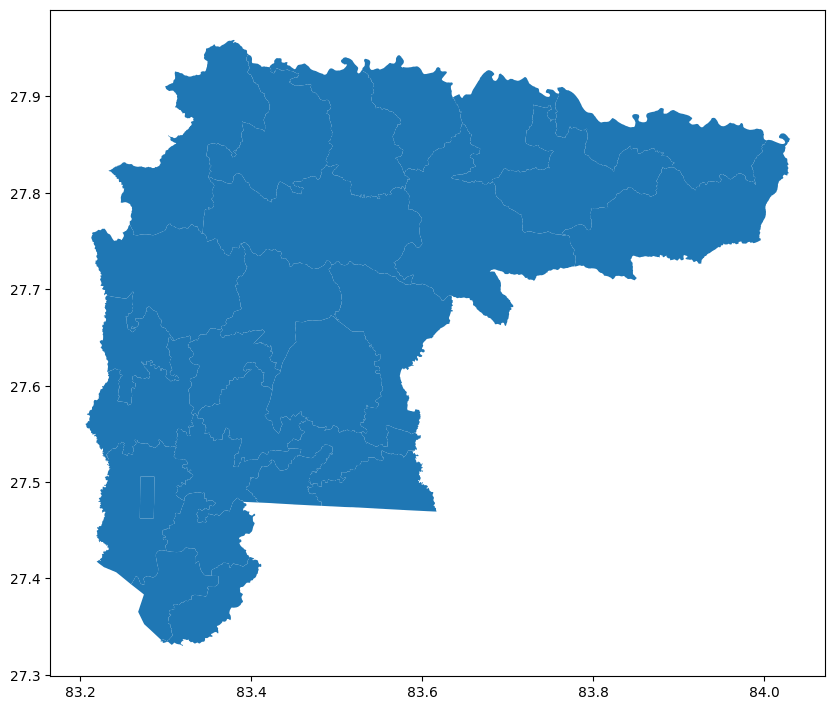

In [101]:
#we will now create a new axis
ax= palpa.plot(figsize=(10,10))
#again ading new file (i.e. rupandehi district map) inside the same plot (palpa district map)
rupandehi.plot(ax=ax)

<Axes: >

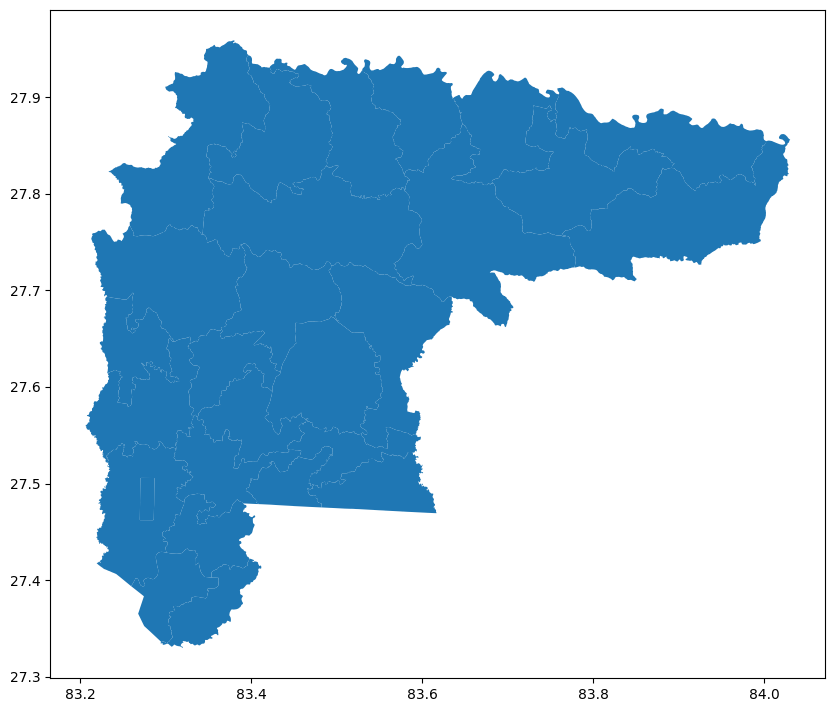

In [99]:
#OR
ax= rupandehi.plot(figsize=(10,10))
palpa.plot(ax=ax)

**Exercise-3:**
1) Find the palikas having area greater than 50 SQKM and plot them along with the legend.